Required packets

In [1]:
from scipy.signal import find_peaks
import torch
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Peek Detection

Load the transform and retrive the right threshold based on the scale, need to understand how to deal with trend probably must be sum

In [2]:
series = read_csv('coefficents.csv', header = 0, index_col = 0, parse_dates= True).squeeze('columns')
series_or = read_csv('series_normalized.csv', header = 0, index_col = 0, parse_dates= True)


# Initialize lists to store coefficients and heights
wav_coef = []
height = []
time_index = series.index
time_diff = time_index.to_series().diff().min()
rows = series.shape[0]
columns = series.shape[1]

# To decide the threshold based on the sampling frequency
daily_threshold = pd.Timedelta(days=1)
weekly_threshold = pd.Timedelta(weeks=1)
monthly_threshold = pd.Timedelta(days=28)
columns_or = series_or.shape[1]
for column in series_or.columns:
    series_or = series_or[column].values.flatten()
    top_10_values = np.sort(series_or)[-20:]
    best_or = np.mean(top_10_values)
    median = np.median(np.sort(series_or))
    best_or = best_or + np.abs(median)
    print("Best height: ", best_or)

print(time_diff)

if time_diff < daily_threshold:
  time_diff = 0
  final_result = torch.zeros(rows, columns // 4, 4)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Find the best height for the current column
      best_height = max(coef)
      threshold = best_height * 0.45
    
      # Determine the height based on the column name or any other criteria
      if 'daily' in column.lower():
          if threshold > 1:
              height.append(threshold)
          else:
              height.append(1)
      elif 'weekly' in column.lower():
          if threshold > 2:
              height.append(threshold)
          else:
              height.append(2)
      elif 'monthly' in column.lower():
          if threshold > 4:
              height.append(threshold)
          else:
              height.append(4)
      elif 'yearly' in column.lower():
          if threshold > 15:
              height.append(threshold)
          else:
              height.append(15)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == daily_threshold:
  time_diff = 1
  final_result = torch.zeros(rows, columns // 3, 3)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Find the best height for the current column
      best_height = max(coef)
      threshold = best_height * 0.45

      # Determine the height based on the column name or any other criteria
      if 'weekly' in column.lower():
          if threshold > 0.5:
              height.append(threshold)
          else:    
              height.append(0.5)
      elif 'monthly' in column.lower():
          if threshold > 1:
              height.append(threshold)
          else:
              height.append(1)
      elif 'yearly' in column.lower():
          if threshold > 2:
              height.append(threshold)
          else:
              height.append(2)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == weekly_threshold:
  time_diff = 2
  final_result = torch.zeros(rows, columns // 2, 2)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Find the best height for the current column
      best_height = max(coef)
      threshold = best_height * 0.45

      if 'monthly' in column.lower():
          if threshold > 0.5:
              height.append(threshold)
          else:
              height.append(0.5)
      elif 'yearly' in column.lower():
          if threshold > 1:
              height.append(threshold)
          else:
              height.append(1)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")
elif time_diff == monthly_threshold:
  time_diff = 3
  final_result = torch.zeros(rows, columns, 1)
  # Iterate over each column in the DataFrame
  for column in series.columns:
      # Get the values of the current column
      coef = series[column].values

      # Append the coefficients to the list
      wav_coef.append(coef)

      # Find the best height for the current column
      best_height = max(coef)
      threshold = best_height * 0.45

      if 'yearly' in column.lower():
          if threshold > 0.5:
            height.append(threshold)
          else:
            height.append(1)
      else:
          # Handle other cases as needed
          raise ValueError("Unsupported Frequency")

print(height)

0 days 01:00:00
[1.9205248500000003, 2, 4, 15, 1, 2, 4, 15, 2.011056165, 2, 4, 15, 1, 2, 4, 15, 1, 2, 4, 15, 1, 2, 4, 15, 1, 2, 4, 15]


Find the index for each scale of those part with a match higher then the threshold

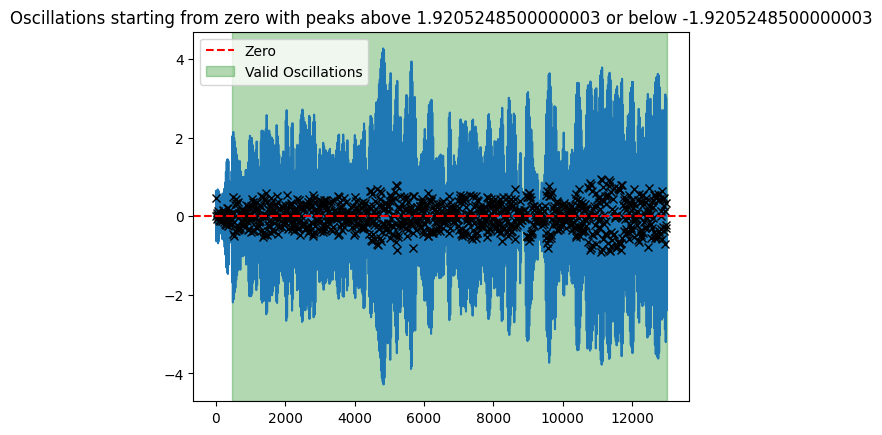

No consecutive index 544-952
No consecutive index 1050-1304
No consecutive index 1639-1735
No consecutive index 1795-1999
No consecutive index 2083-2167
No consecutive index 2226-2420
No consecutive index 2742-2791
No consecutive index 2874-3510
No consecutive index 3570-4195
No consecutive index 4302-4423
No consecutive index 5345-5420
No consecutive index 5778-5995
No consecutive index 6054-6103
No consecutive index 6271-6702
No consecutive index 6774-7027
No consecutive index 7242-7314
No consecutive index 7530-7807
No consecutive index 7939-8191
No consecutive index 8299-8407
No consecutive index 8647-8934
No consecutive index 9114-9510
No consecutive index 9819-10363
No consecutive index 10543-10663
No consecutive index 11768-11839
No consecutive index 12067-12152
[  473   474   475 ... 12994 12995 12996]
torch.Size([13003, 7, 4])


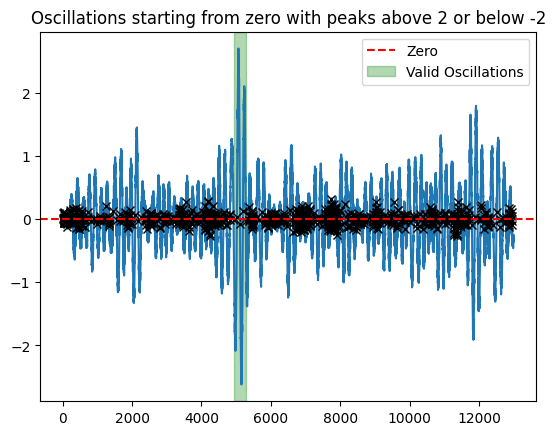

[4925 4926 4927 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938
 4939 4940 4941 4942 4943 4944 4945 4946 4947 4948 4949 4950 4951 4952
 4953 4954 4955 4956 4957 4958 4959 4960 4961 4962 4963 4964 4965 4966
 4967 4968 4969 4970 4971 4972 4973 4974 4975 4976 4977 4978 4979 4980
 4981 4982 4983 4984 4985 4986 4987 4988 4989 4990 4991 4992 4993 4994
 4995 4996 4997 4998 4999 5000 5001 5002 5003 5004 5005 5006 5007 5008
 5009 5010 5011 5012 5013 5014 5015 5016 5017 5018 5019 5020 5021 5022
 5023 5024 5025 5026 5027 5028 5029 5030 5031 5032 5033 5034 5035 5036
 5037 5038 5039 5040 5041 5042 5043 5044 5045 5046 5047 5048 5049 5050
 5051 5052 5053 5054 5055 5056 5057 5058 5059 5060 5061 5062 5063 5064
 5065 5066 5067 5068 5069 5070 5071 5072 5073 5074 5075 5076 5077 5078
 5079 5080 5081 5082 5083 5084 5085 5086 5087 5088 5089 5090 5091 5092
 5093 5094 5095 5096 5097 5098 5099 5100 5101 5102 5103 5104 5105 5106
 5107 5108 5109 5110 5111 5112 5113 5114 5115 5116 5117 5118 5119 5120
 5121 

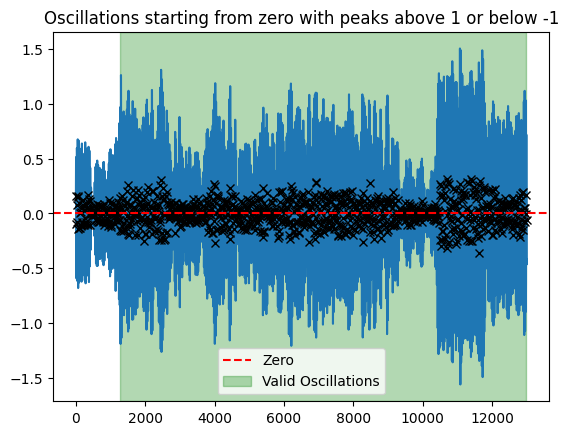

No consecutive index 1535-2413
No consecutive index 2522-3989
No consecutive index 4047-4419
No consecutive index 4467-6135
No consecutive index 6230-6863
No consecutive index 6946-8254
No consecutive index 8326-10426
No consecutive index 11792-12910
[ 1476  1477  1478 ... 12967 12968 12969]
torch.Size([13003, 7, 4])


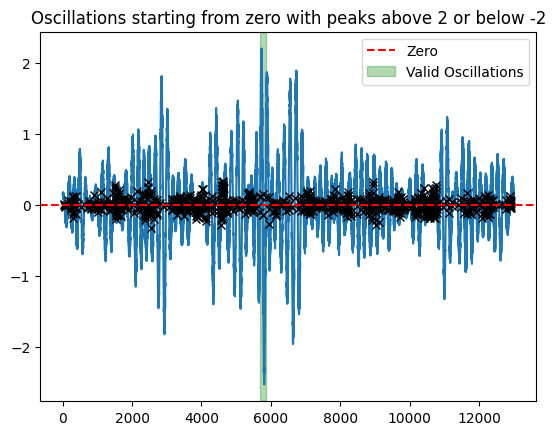

[]
torch.Size([13003, 7, 4])


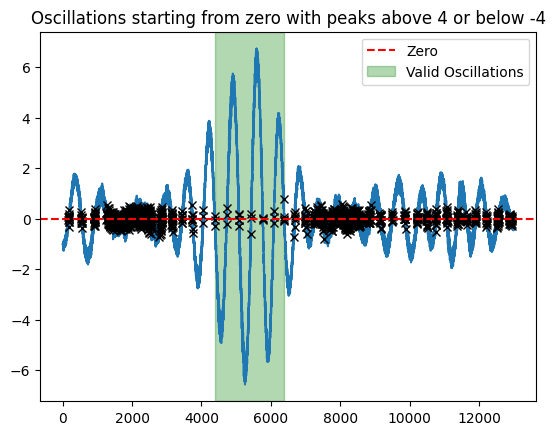

[4388 4389 4390 ... 6375 6376 6377]
torch.Size([13003, 7, 4])
All points under 15


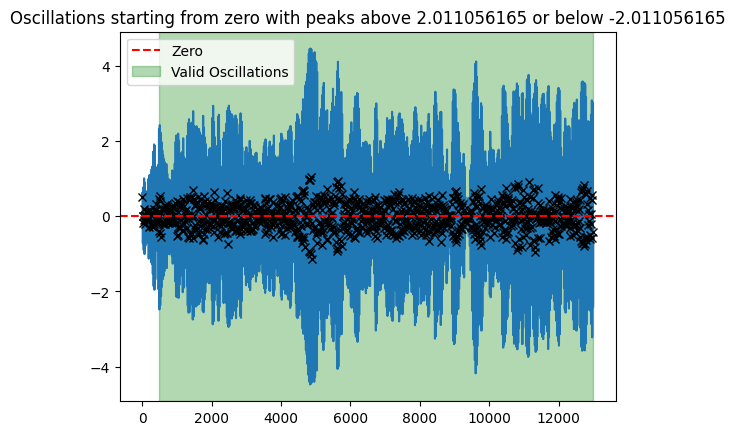

No consecutive index 544-965
No consecutive index 1062-1292
No consecutive index 1675-1724
No consecutive index 1819-1999
No consecutive index 2108-2168
No consecutive index 2239-2324
No consecutive index 2742-2791
No consecutive index 2874-4183
No consecutive index 4302-4411
No consecutive index 5778-5984
No consecutive index 6270-6691
No consecutive index 6787-7027
No consecutive index 7255-7314
No consecutive index 7554-7759
No consecutive index 7951-8023
No consecutive index 8299-8407
No consecutive index 8647-8935
No consecutive index 9127-9510
No consecutive index 9820-10363
No consecutive index 10566-10652
No consecutive index 11803-11863
No consecutive index 12067-12163
No consecutive index 12331-12390
[  474   475   476 ... 12994 12995 12996]
torch.Size([13003, 7, 4])


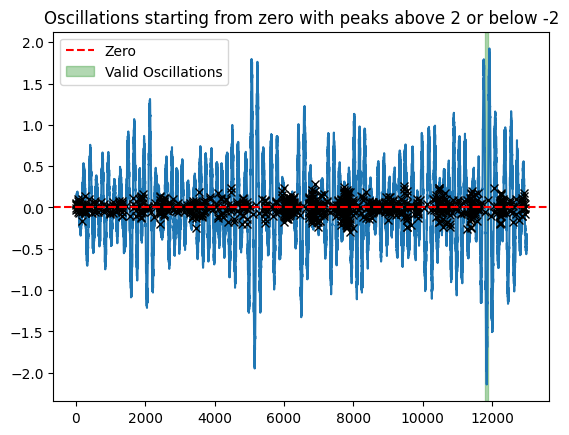

[]
torch.Size([13003, 7, 4])
All points under 4
All points under 15


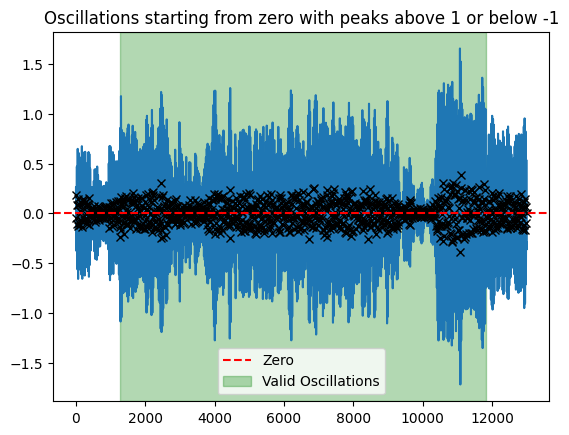

No consecutive index 2511-3964
No consecutive index 4035-4419
No consecutive index 4467-6147
No consecutive index 6242-6863
No consecutive index 6945-10426
No consecutive index 10641-10690
No consecutive index 10882-10942
No consecutive index 10990-11041
No consecutive index 11146-11535
[ 2426  2427  2428 ... 11813 11814 11815]
torch.Size([13003, 7, 4])


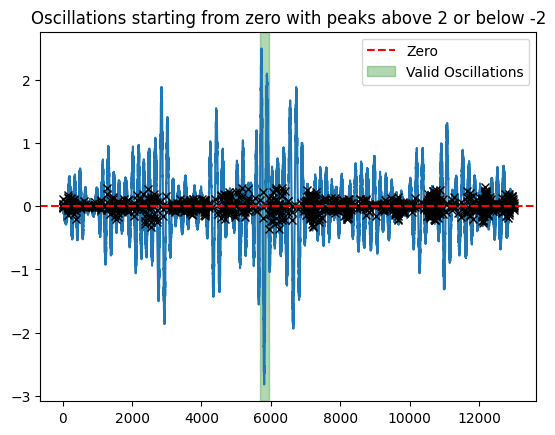

[]
torch.Size([13003, 7, 4])


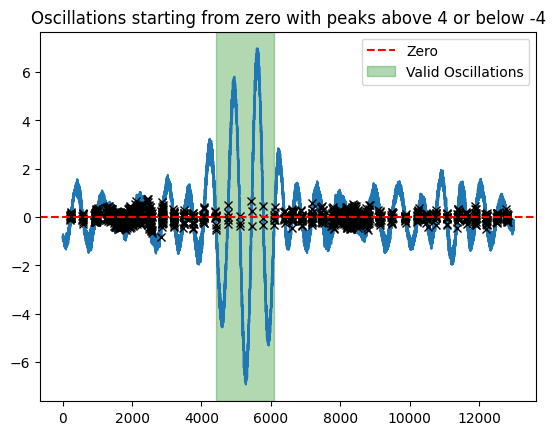

[4424 4425 4426 ... 6096 6097 6098]
torch.Size([13003, 7, 4])
All points under 15


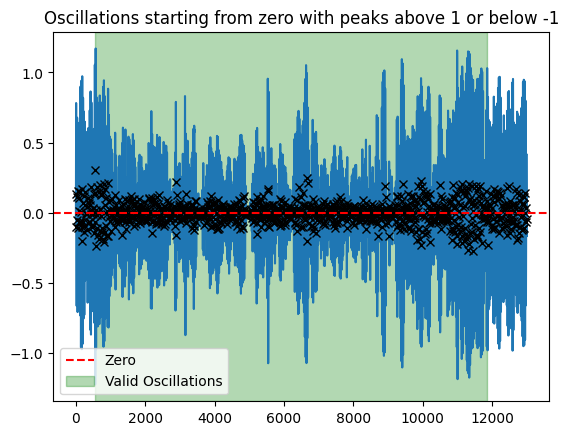

No consecutive index 9441-11266
No consecutive index 11384-11673
[ 9381  9382  9383  9384  9385  9386  9387  9388  9389  9390  9391  9392
  9393  9394  9395  9396  9397  9398  9399  9400  9401  9402  9403  9404
  9405  9406  9407  9408  9409  9410  9411  9412  9413  9414  9415  9416
  9417  9418  9419  9420  9421  9422  9423  9424  9425  9426  9427  9428
  9429  9430  9431  9432  9433  9434  9435  9436  9437  9438  9439  9440
  9441 11266 11267 11268 11269 11270 11271 11272 11273 11274 11275 11276
 11277 11278 11279 11280 11281 11282 11283 11284 11285 11286 11287 11288
 11289 11290 11291 11292 11293 11294 11295 11296 11297 11298 11299 11300
 11301 11302 11303 11304 11305 11306 11307 11308 11309 11310 11311 11312
 11313 11314 11315 11316 11317 11318 11319 11320 11321 11322 11323 11324
 11325 11326 11327 11328 11329 11330 11331 11332 11333 11334 11335 11336
 11337 11338 11339 11340 11341 11342 11343 11344 11345 11346 11347 11348
 11349 11350 11351 11352 11353 11354 11355 11356 11357 1135

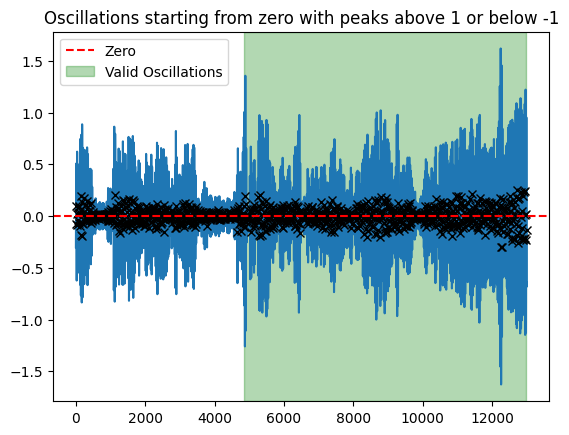

No consecutive index 4904-12205
No consecutive index 12292-12674
[ 4856  4857  4858  4859  4860  4861  4862  4863  4864  4865  4866  4867
  4868  4869  4870  4871  4872  4873  4874  4875  4876  4877  4878  4879
  4880  4881  4882  4883  4884  4885  4886  4887  4888  4889  4890  4891
  4892  4893  4894  4895  4896  4897  4898  4899  4900  4901  4902  4903
  4904 12205 12206 12207 12208 12209 12210 12211 12212 12213 12214 12215
 12216 12217 12218 12219 12220 12221 12222 12223 12224 12225 12226 12227
 12228 12229 12230 12231 12232 12233 12234 12235 12236 12237 12238 12239
 12240 12241 12242 12243 12244 12245 12246 12247 12248 12249 12250 12251
 12252 12253 12254 12255 12256 12257 12258 12259 12260 12261 12262 12263
 12264 12265 12266 12267 12268 12269 12270 12271 12272 12273 12274 12275
 12276 12277 12278 12279 12280 12281 12282 12283 12284 12285 12286 12287
 12288 12289 12290 12291 12292 12674 12675 12676 12677 12678 12679 12680
 12681 12682 12683 12684 12685 12686 12687 12688 12689 1269

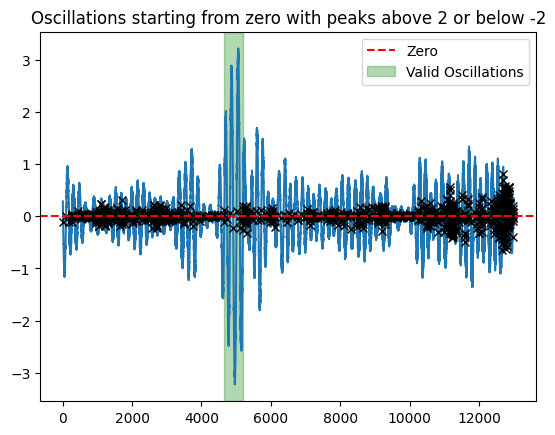

[4658 4659 4660 4661 4662 4663 4664 4665 4666 4667 4668 4669 4670 4671
 4672 4673 4674 4675 4676 4677 4678 4679 4680 4681 4682 4683 4684 4685
 4686 4687 4688 4689 4690 4691 4692 4693 4694 4695 4696 4697 4698 4699
 4700 4701 4702 4703 4704 4705 4706 4707 4708 4709 4710 4711 4712 4713
 4714 4715 4716 4717 4718 4719 4720 4721 4722 4723 4724 4725 4726 4727
 4728 4729 4730 4731 4732 4733 4734 4735 4736 4737 4738 4739 4740 4741
 4742 4743 4744 4745 4746 4747 4748 4749 4750 4751 4752 4753 4754 4755
 4756 4757 4758 4759 4760 4761 4762 4763 4764 4765 4766 4767 4768 4769
 4770 4771 4772 4773 4774 4775 4776 4777 4778 4779 4780 4781 4782 4783
 4784 4785 4786 4787 4788 4789 4790 4791 4792 4793 4794 4795 4796 4797
 4798 4799 4800 4801 4802 4803 4804 4805 4806 4807 4808 4809 4810 4811
 4812 4813 4814 4815 4816 4817 4818 4819 4820 4821 4822 4823 4824 4825
 4826 4827 4828 4829 4830 4831 4832 4833 4834 4835 4836 4837 4838 4839
 4840 4841 4842 4843 4844 4845 4846 4847 4848 4849 4850 4851 4852 4853
 4854 

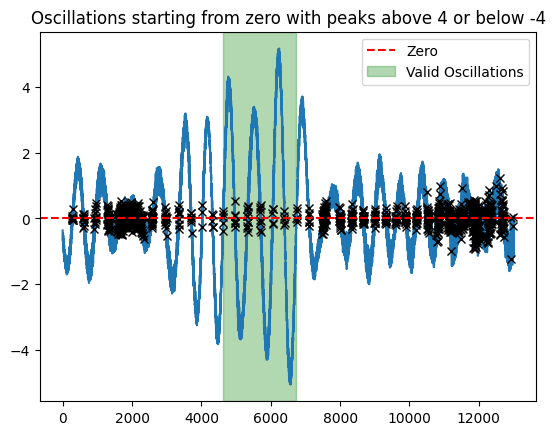

[4632 4633 4634 ... 6739 6740 6741]
torch.Size([13003, 7, 4])
All points under 15


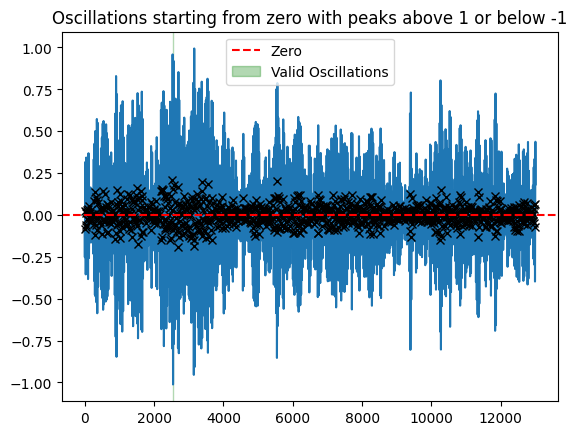

[]
torch.Size([13003, 7, 4])


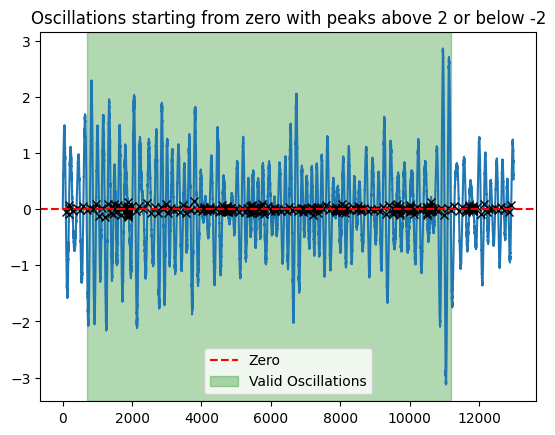

No consecutive index 1296-10829
[  689   690   691   692   693   694   695   696   697   698   699   700
   701   702   703   704   705   706   707   708   709   710   711   712
   713   714   715   716   717   718   719   720   721   722   723   724
   725   726   727   728   729   730   731   732   733   734   735   736
   737   738   739   740   741   742   743   744   745   746   747   748
   749   750   751   752   753   754   755   756   757   758   759   760
   761   762   763   764   765   766   767   768   769   770   771   772
   773   774   775   776   777   778   779   780   781   782   783   784
   785   786   787   788   789   790   791   792   793   794   795   796
   797   798   799   800   801   802   803   804   805   806   807   808
   809   810   811   812   813   814   815   816   817   818   819   820
   821   822   823   824   825   826   827   828   829   830   831   832
   833   834   835   836   837   838   839   840   841   842   843   844
   845   846   847 

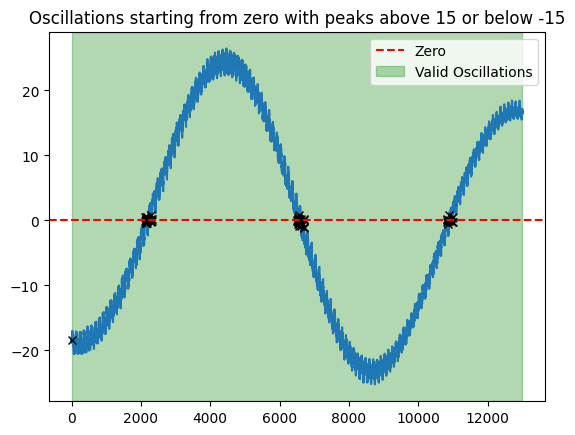

[]
torch.Size([13003, 7, 4])


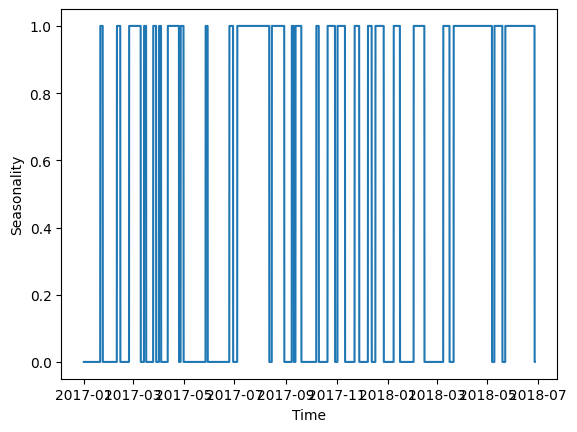

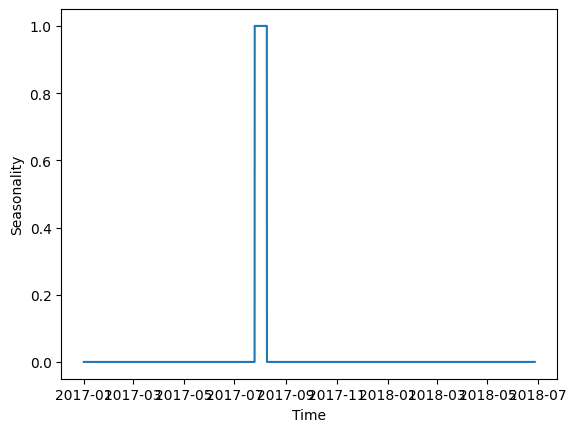

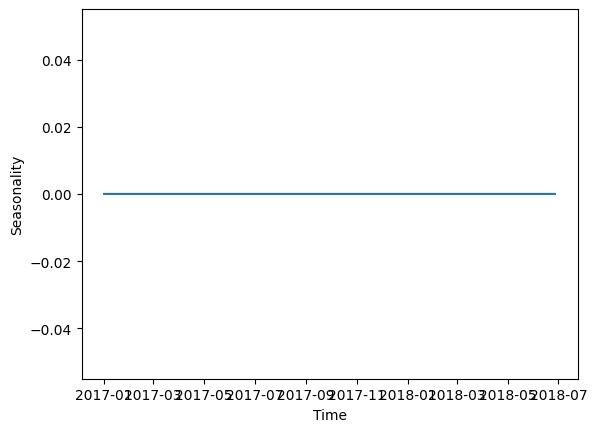

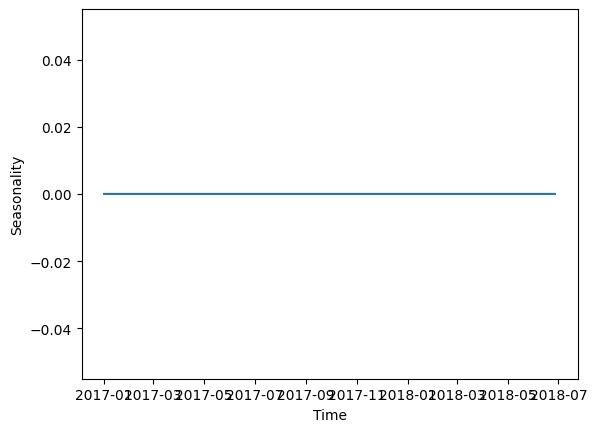

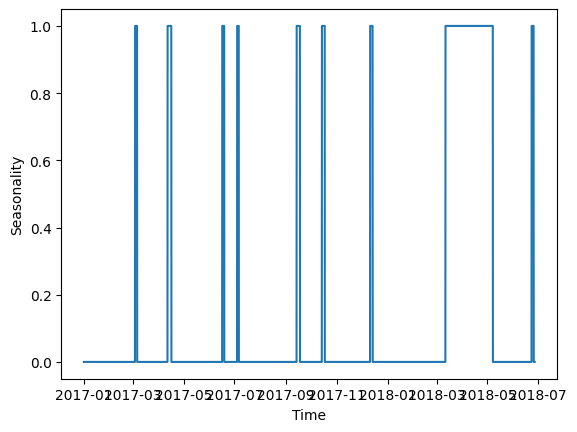

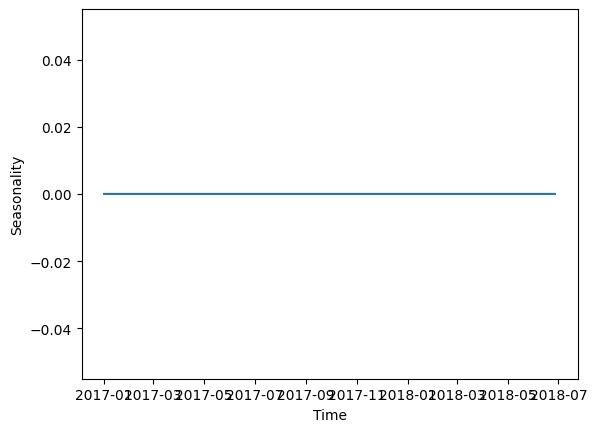

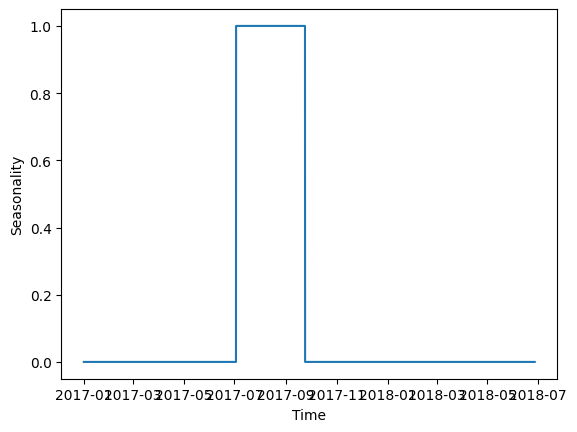

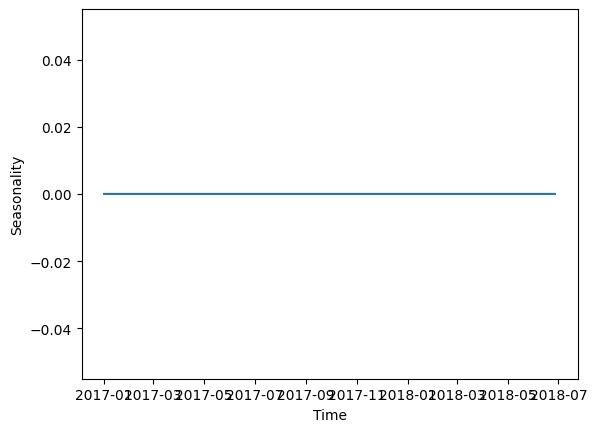

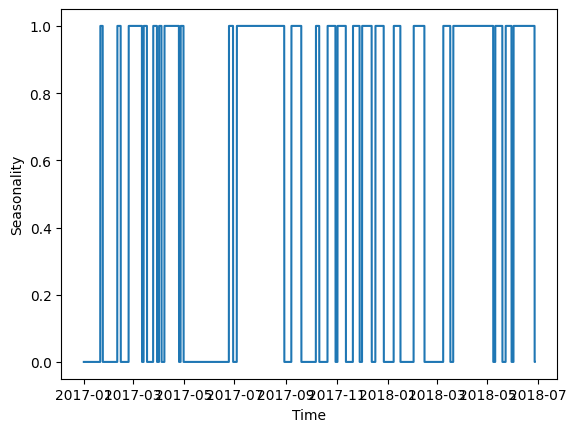

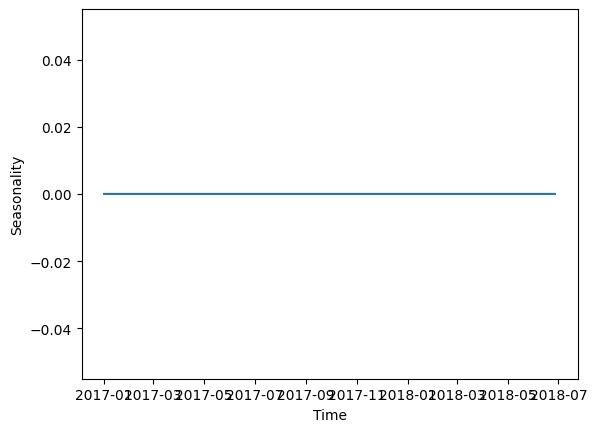

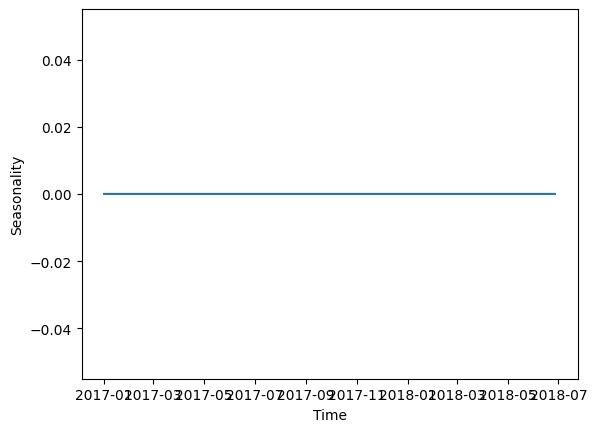

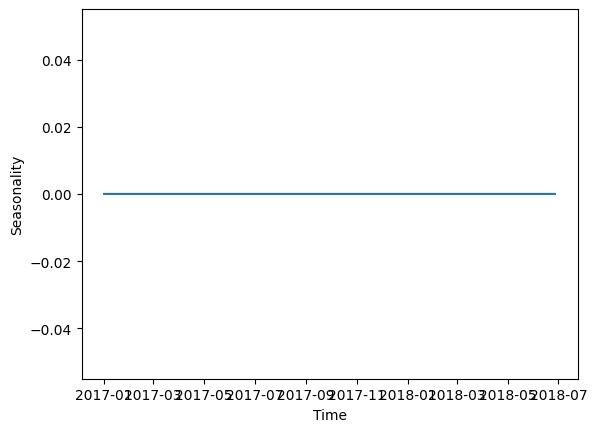

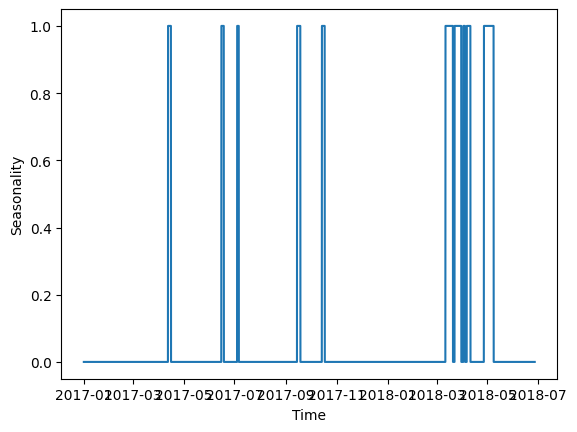

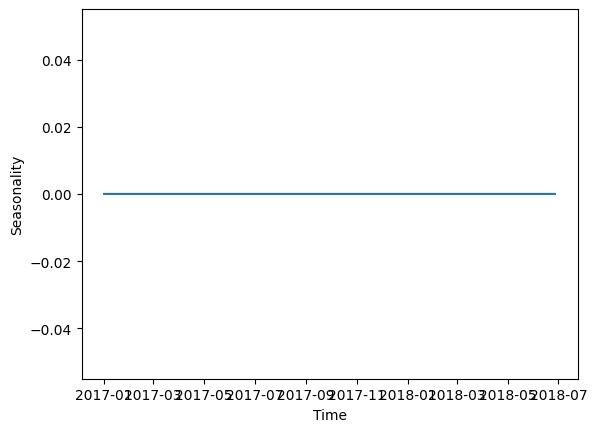

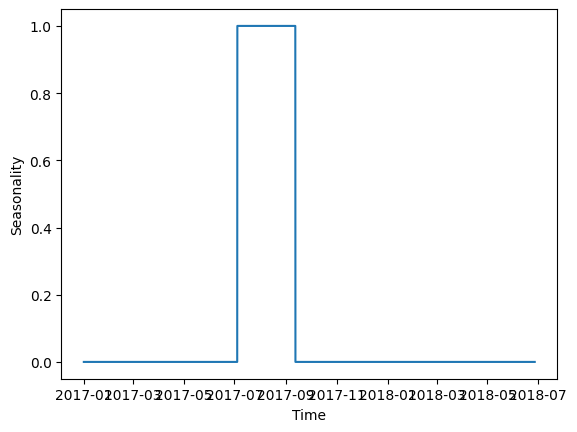

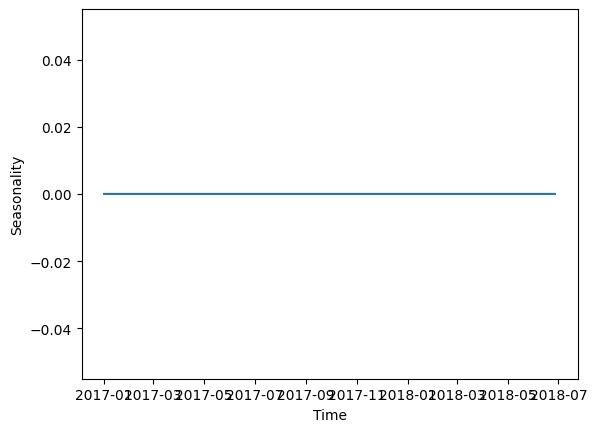

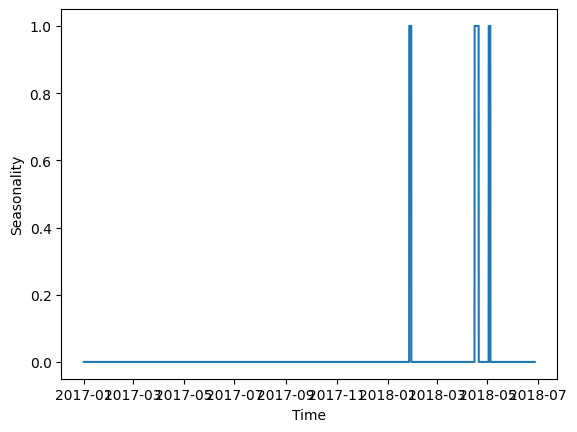

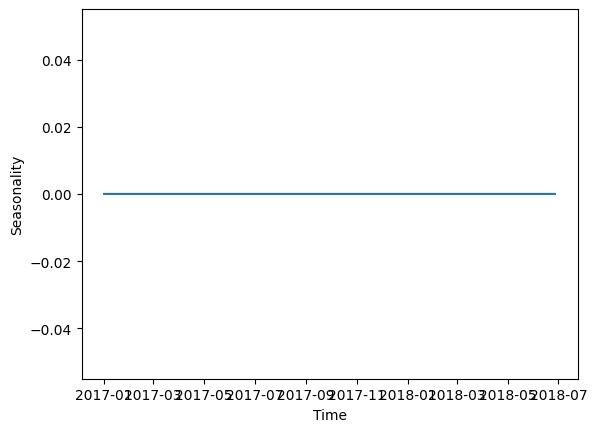

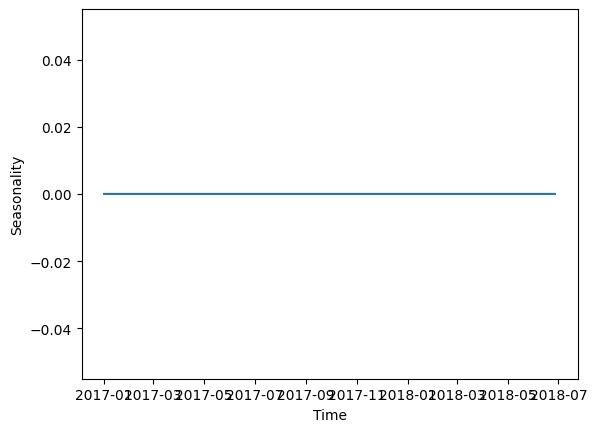

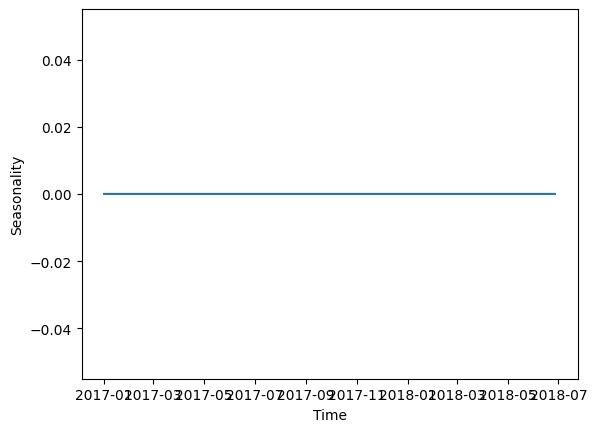

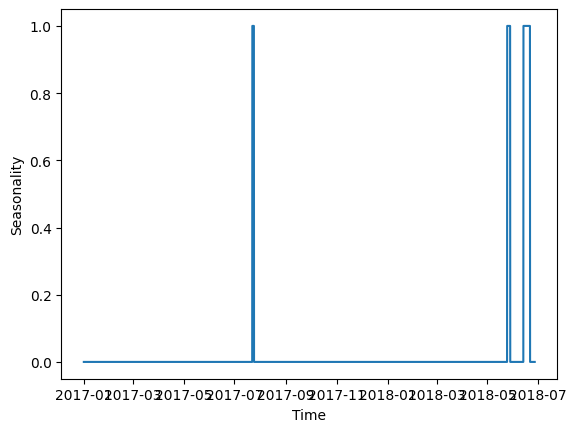

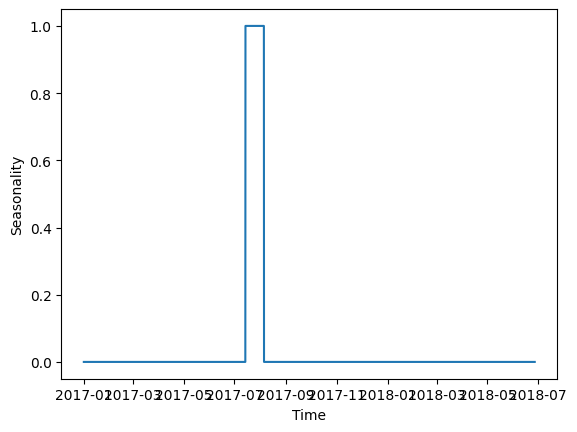

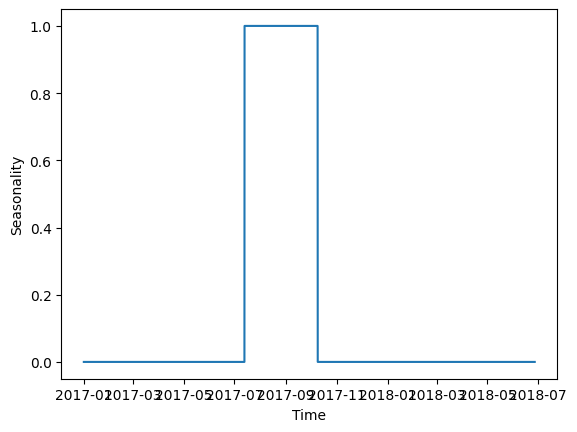

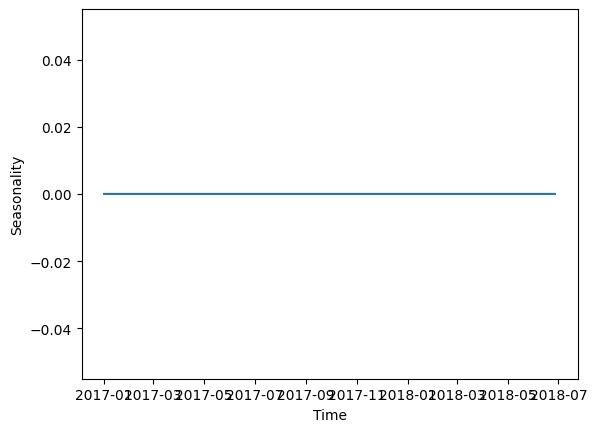

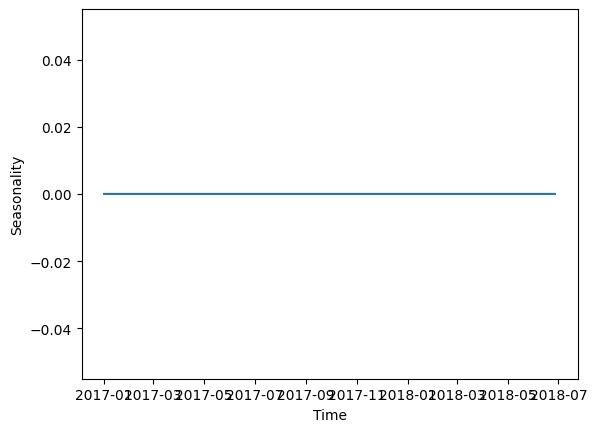

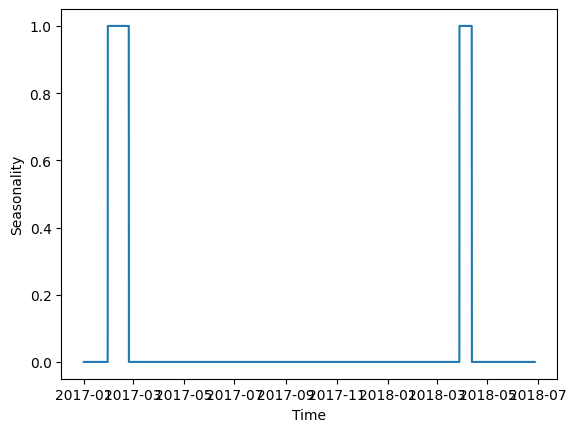

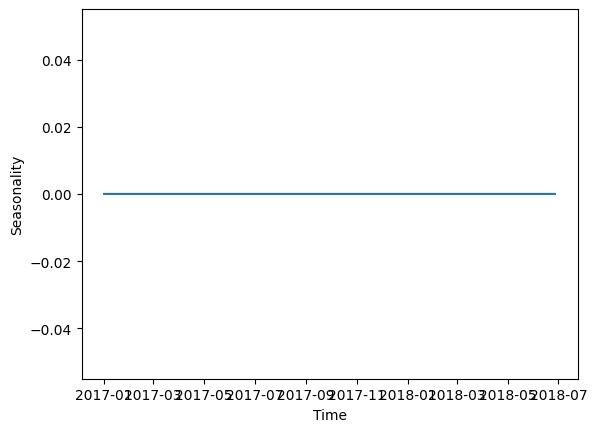

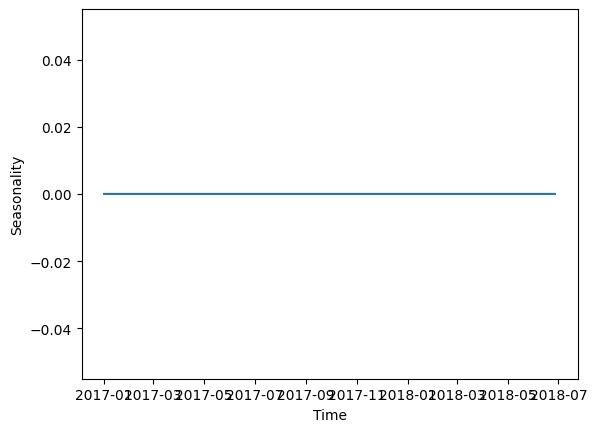

In [3]:
iter = 0
for height, coef in zip(height, wav_coef):
  iter = iter + 1

  # Assuming coef is your ndarray
  peaks_above, _ = find_peaks(coef, height)
  peaks_below, _ = find_peaks(-coef, height)
  # Combine the peaks from both conditions
  all_peaks = np.concatenate([peaks_above, peaks_below])
  # Sort the indices for plotting purposes
  all_peaks = np.sort(all_peaks)

  # Find zero-crossings by detecting sign changes
  coefsign = np.sign(coef)
  signchange = ((np.roll(coefsign, 1) - coefsign) != 0).astype(int)
  zero_crossings = np.where(signchange == 1)[0]
  #zero_crossings = np.where(np.diff(np.sign(coef)) != 0)[0]

  # Initialize an array to store indices of all oscillations
  all_oscillations = []

  if all_peaks.size == 0:
    print(f'All points under {height}')
    continue

  if all_peaks[0] < zero_crossings[0]:
    i = zero_crossings[0]
    all_oscillations.extend(range(0, i))

  # Iterate through zero-crossings to identify entire oscillations
  for i in range(len(zero_crossings) - 1):
      start_index = zero_crossings[i]
      end_index = zero_crossings[i + 1]

      # Check if there are peaks above the threshold within the interval
      if np.max(coef[start_index:end_index]) > height or np.min(coef[start_index:end_index]) < -height:
          all_oscillations.extend(range(start_index, end_index))


  # Check if the last peak is above the threshold
  if all_peaks[-1] > zero_crossings[-1]:
      start_index = zero_crossings[-1]
      end_index = all_peaks[-1]


      # Extend the oscillation to the right if values are increasing
      while end_index < len(coef) - 1 and coef[end_index] > coef[end_index + 1]:
          end_index += 1

      all_oscillations.extend(range(start_index, end_index + 1))

  # Convert the list to a NumPy array
  all_oscillations = np.unique(all_oscillations).tolist()

  # Plotting
  plt.plot(coef)
  #plt.plot(all_peaks, coef[all_peaks], "xk")
  plt.plot(zero_crossings, coef[zero_crossings], "xk")
  plt.axhline(y=0, color='r', linestyle='--', label='Zero')
  plt.axvspan(all_oscillations[0], all_oscillations[-1], color='green', alpha=0.3, label='Valid Oscillations')
  plt.title(f'Oscillations starting from zero with peaks above {height} or below {-height}')
  plt.legend()
  plt.show()


  # Check for consecutive index
  for i in range(len(all_oscillations)-1):
    if all_oscillations[i]+1 != all_oscillations[i+1]:
      count = all_oscillations[i+1]-all_oscillations[i]
      if time_diff == 0:
        if (iter % 4) == 1 and count <= 2*24:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 2 and count <= 2*24*7:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 3 and count <= 2*24*28:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 4) == 0 and count <= 2*24*360:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      elif time_diff == 1:
        if (iter % 3) == 1 and count <= 2*7:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 3) == 2 and count <= 2*28:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 3) == 0 and count <= 2*360:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      elif time_diff == 2:
        if (iter % 2) == 1 and count <= 2*4:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
        elif (iter % 2) == 0 and count <= 2*4*12:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))
      else:
        if count <= 2*12:
          all_oscillations.extend(range(all_oscillations[i], all_oscillations[i+1]))

  all_oscillations = np.unique(all_oscillations)

  # Create a new list to store the non-consecutive indices
  non_consecutive_indices = []

  # Initialize a variable to store the count threshold based on time_diff and iter
  if time_diff == 0:
      if (iter % 4) == 1:
          count_threshold = 2*24
      elif (iter % 4) == 2:
          count_threshold = 24 * 7 *2
      elif (iter % 4) == 3:
          count_threshold = 24 * 28*2
      elif (iter % 4) == 0:
          count_threshold = 24 * 360*2
  elif time_diff == 1:
      if (iter % 3) == 1:
          count_threshold = 7*2
      elif (iter % 3) == 2:
          count_threshold = 28*2
      elif (iter % 3) == 0:
          count_threshold = 360*2
  elif time_diff == 2:
      if  (iter % 2) == 1:
          count_threshold = 4*2
      elif (iter % 2) == 0:
          count_threshold = 4 * 12*2
  elif time_diff == 3:
    count_threshold = 12*2


  # Iterate through all_oscillations and check for consecutive points
  i = 0
  while i < len(all_oscillations):
      start_index = all_oscillations[i]
      end_index = all_oscillations[i]

      # Find the end of the consecutive sequence
      while i < len(all_oscillations) - 1 and all_oscillations[i] + 1 == all_oscillations[i+1]:
          end_index = all_oscillations[i+1]
          i += 1

      # Check if the consecutive sequence is shorter than the count threshold
      count = end_index - start_index + 1
      if count <= count_threshold:
          non_consecutive_indices.extend(range(start_index, end_index + 1))

      i += 1

  # Remove consecutive indices shorter than the count threshold from all_oscillations
  all_oscillations = np.array([index for index in all_oscillations if index not in non_consecutive_indices])

  i=0

  for i in range(len(all_oscillations)-1):
    if all_oscillations[i]+1 != all_oscillations[i+1]:
      print(f"No consecutive index {all_oscillations[i]}-{all_oscillations[i+1]}")

  print(all_oscillations)

  # Itera su ogni indice in all_oscillations
  for idx in all_oscillations:
    if time_diff == 0:
      final_result[idx, (iter - 1) // 4, (iter - 1) % 4] = 1
    elif time_diff == 1:
      final_result[idx, (iter - 1) // 3, (iter - 1) % 3] = 1
    elif time_diff == 2:
      final_result[idx, (iter - 1) // 2, (iter - 1) % 2] = 1
    else:
      final_result[idx, iter - 1, 0] = 1

  print(final_result.shape)

torch.save(final_result, 'result.pt')
# Plotting
for i in range(final_result.shape[1]):
    for j in range(final_result.shape[2]):
        plt.plot(time_index, final_result[:, i, j])
        plt.xlabel('Time')
        plt.ylabel('Seasonality')
        plt.show()